In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
# print(os.listdir("../input"))

import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D,concatenate,Concatenate,multiply, LocallyConnected2D, Lambda)
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.utils import Sequence, to_categorical
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

import matplotlib.pyplot as plt
import PIL
import cv2
import tensorflow as tf
import pandas as pd
import imgaug as ia
import numpy as np

from imgaug import augmenters as iaa

from PIL import Image, ImageOps
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, fbeta_score, cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

%config InlineBackend.figure_format="svg"
%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/mini/aptos2019-blindness-detection/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/mini/aptos2019-blindness-detection/test.csv')


In [ ]:
df0=df_train[df_train["diagnosis"]==0]
df1=df_train[df_train["diagnosis"]==1]
df2=df_train[df_train["diagnosis"]==2]
df3=df_train[df_train["diagnosis"]==3]
df4=df_train[df_train["diagnosis"]==4]

In [ ]:
type(df0)

pandas.core.frame.DataFrame

In [ ]:
df0

,id_code,diagnosis
3,002c21358ce6,0
4,005b95c28852,0
6,0097f532ac9f,0
10,00cc2b75cddd,0
12,00f6c1be5a33,0
...,...,...
3651,ff4cd992667b,0
3653,ff59d44a70a7,0
3654,ff631653374e,0
3658,ffc04fed30e6,0


In [ ]:
df0=df0.sample(400)

In [ ]:
df0

,id_code,diagnosis
1470,66bfec8d6bcd,0
1919,874f8c1929f6,0
1832,810ed108f5b7,0
157,0babc12807b2,0
2954,cd1c98ec48b1,0
...,...,...
918,42985aa2e32f,0
1936,883c6a184f16,0
3660,ffd97f8cd5aa,0
3583,f9e1c439d4c8,0


In [ ]:
df1

,id_code,diagnosis
2,0024cdab0c1e,1
9,00cb6555d108,1
14,0124dffecf29,1
22,01b3aed3ed4c,1
45,0369f3efe69b,1
...,...,...
3630,fdd18ccbbdc5,1
3635,fe2df69676cf,1
3639,fe674c2f73f5,1
3640,fea14b3d44b0,1


In [ ]:
df2=df2.sample(400)

In [ ]:
df2

,id_code,diagnosis
2151,97a5ad7548b7,2
25,01eb826f6467,2
1770,7d1b40fdbd86,2
377,1bea04b2bb2d,2
1918,873fe0404d6e,2
...,...,...
1810,7f84284598f5,2
2828,c3e02d4a1798,2
417,1dd9adcbfff4,2
619,2b88cb6e31cd,2


In [ ]:
df3

,id_code,diagnosis
13,0104b032c141,3
49,03c85870824c,3
56,042470a92154,3
74,05cd0178ccfe,3
81,069f43616fab,3
...,...,...
3574,f9156aeffc5e,3
3597,fb61230b99dd,3
3618,fcc6aa6755e6,3
3627,fda39982a810,3


In [ ]:
edited_dataset=df0.append(
                 df1,
                 ignore_index=False,
                 verify_integrity=False,
                 sort=False
                )

In [ ]:
edited_dataset

,id_code,diagnosis
1470,66bfec8d6bcd,0
1919,874f8c1929f6,0
1832,810ed108f5b7,0
157,0babc12807b2,0
2954,cd1c98ec48b1,0
...,...,...
3630,fdd18ccbbdc5,1
3635,fe2df69676cf,1
3639,fe674c2f73f5,1
3640,fea14b3d44b0,1


In [ ]:
edited_dataset=edited_dataset.append(
                 df2,
                 ignore_index=False,
                 verify_integrity=False,
                 sort=False
                )

In [ ]:
edited_dataset

,id_code,diagnosis
1470,66bfec8d6bcd,0
1919,874f8c1929f6,0
1832,810ed108f5b7,0
157,0babc12807b2,0
2954,cd1c98ec48b1,0
...,...,...
1810,7f84284598f5,2
2828,c3e02d4a1798,2
417,1dd9adcbfff4,2
619,2b88cb6e31cd,2


In [ ]:
edited_dataset=edited_dataset.append(
                 df3,
                 ignore_index=False,
                 verify_integrity=False,
                 sort=False
                )

In [ ]:
edited_dataset

,id_code,diagnosis
1470,66bfec8d6bcd,0
1919,874f8c1929f6,0
1832,810ed108f5b7,0
157,0babc12807b2,0
2954,cd1c98ec48b1,0
...,...,...
3574,f9156aeffc5e,3
3597,fb61230b99dd,3
3618,fcc6aa6755e6,3
3627,fda39982a810,3


In [ ]:
edited_dataset=edited_dataset.append(
                 df4,
                 ignore_index=False,
                 verify_integrity=False,
                 sort=False
                )

In [ ]:
edited_dataset

,id_code,diagnosis
1470,66bfec8d6bcd,0
1919,874f8c1929f6,0
1832,810ed108f5b7,0
157,0babc12807b2,0
2954,cd1c98ec48b1,0
...,...,...
3589,fa59221cf464,4
3598,fb696a8e055a,4
3620,fce93caa4758,4
3631,fdd534271f3d,4


In [ ]:
import warnings
warnings.filterwarnings("ignore")
SIZE = 300
NUM_CLASSES = 5
WORKERS=2

In [ ]:
df_train=edited_dataset

In [ ]:
x_test,y_test = train_test_split(df_train,test_size=0.05,random_state=42)

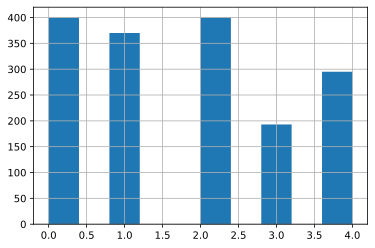

In [ ]:


x = df_train['id_code']
y = df_train['diagnosis']

x, y = shuffle(x, y, random_state=8)
y.hist()

In [ ]:


sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
        [
            # apply the following augmenters to most images
            iaa.Fliplr(0.5), # horizontally flip 50% of all images
            iaa.Flipud(0.2), # vertically flip 20% of all images
            sometimes(iaa.Affine(
                scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}, # scale images to 80-120% of their size, individually per axis
                translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, # translate by -20 to +20 percent (per axis)
                rotate=(-10, 10), # rotate by -45 to +45 degrees
                shear=(-5, 5), # shear by -16 to +16 degrees
                order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
                cval=(0, 255), # if mode is constant, use a cval between 0 and 255
                mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
            )),
            # execute 0 to 5 of the following (less important) augmenters per image
            # don't execute all of them, as that would often be way too strong
            iaa.SomeOf((0, 5),
                [
                    sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                    iaa.OneOf([
                        iaa.GaussianBlur((0, 1.0)), # blur images with a sigma between 0 and 3.0
                        iaa.AverageBlur(k=(3, 5)), # blur image using local means with kernel sizes between 2 and 7
                        iaa.MedianBlur(k=(3, 5)), # blur image using local medians with kernel sizes between 2 and 7
                    ]),
                    iaa.Sharpen(alpha=(0, 1.0), lightness=(0.9, 1.1)), # sharpen images
                    iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                    # search either for all edges or for directed edges,
                    # blend the result with the original image using a blobby mask
                    iaa.SimplexNoiseAlpha(iaa.OneOf([
                        iaa.EdgeDetect(alpha=(0.5, 1.0)),
                        iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                    ])),
                    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.01*255), per_channel=0.5), # add gaussian noise to images
                    iaa.OneOf([
                        iaa.Dropout((0.01, 0.05), per_channel=0.5), # randomly remove up to 10% of the pixels
                        iaa.CoarseDropout((0.01, 0.03), size_percent=(0.01, 0.02), per_channel=0.2),
                    ]),
                    iaa.Invert(0.01, per_channel=True), # invert color channels
                    iaa.Add((-2, 2), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                    iaa.AddToHueAndSaturation((-1, 1)), # change hue and saturation
                    # either change the brightness of the whole image (sometimes
                    # per channel) or change the brightness of subareas
                    iaa.OneOf([
                        iaa.Multiply((0.9, 1.1), per_channel=0.5),
                        iaa.FrequencyNoiseAlpha(
                            exponent=(-1, 0),
                            first=iaa.Multiply((0.9, 1.1), per_channel=True),
                            second=iaa.ContrastNormalization((0.9, 1.1))
                        )
                    ]),
                    sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                    sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                    sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
                ],
                random_order=True
            )
        ],
        random_order=True)


In [ ]:
class My_Generator(Sequence):

    def __init__(self, image_filenames, labels,
                 batch_size, is_train=True,
                 mix=False, augment=False):
        self.image_filenames, self.labels = image_filenames, labels
        self.batch_size = batch_size
        self.is_train = is_train
        self.is_augment = augment
        if(self.is_train):
            self.on_epoch_end()
        self.is_mix = mix

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        if(self.is_train):
            return self.train_generate(batch_x, batch_y)
        return self.valid_generate(batch_x, batch_y)

    def on_epoch_end(self):
        if(self.is_train):
            self.image_filenames, self.labels = shuffle(self.image_filenames, self.labels)
        else:
            pass
    
    def mix_up(self, x, y):
        lam = np.random.beta(0.2, 0.4)
        ori_index = np.arange(int(len(x)))
        index_array = np.arange(int(len(x)))
        np.random.shuffle(index_array)        
        
        mixed_x = lam * x[ori_index] + (1 - lam) * x[index_array]
        mixed_y = lam * y[ori_index] + (1 - lam) * y[index_array]
        
        return mixed_x, mixed_y

    def train_generate(self, batch_x, batch_y):
        batch_images = []
        for (sample, label) in zip(batch_x, batch_y):
            img = cv2.imread('/content/drive/MyDrive/mini/aptos2019-blindness-detection/train_images/'+sample+'.png')
            img = cv2.resize(img, (SIZE, SIZE))
            if(self.is_augment):
                img = seq.augment_image(img)
            batch_images.append(img)
        batch_images = np.array(batch_images, np.float32) / 255
        batch_y = np.array(batch_y, np.float32)
        if(self.is_mix):
            batch_images, batch_y = self.mix_up(batch_images, batch_y)
        return batch_images, batch_y

    def valid_generate(self, batch_x, batch_y):
        batch_images = []
        for (sample, label) in zip(batch_x, batch_y):
            img = cv2.imread('/content/drive/MyDrive/mini/aptos2019-blindness-detection/train_images/'+sample+'.png')
            img = cv2.resize(img, (SIZE, SIZE))
            batch_images.append(img)
        batch_images = np.array(batch_images, np.float32) / 255
        batch_y = np.array(batch_y, np.float32)
        return batch_images, batch_y

In [ ]:
y = to_categorical(y, num_classes=NUM_CLASSES)
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,
                                                      stratify=y, random_state=8)

In [ ]:



from keras.callbacks import (ModelCheckpoint, LearningRateScheduler,
                             EarlyStopping, ReduceLROnPlateau,CSVLogger)

epochs = 30; batch_size = 16
checkpoint = ModelCheckpoint('/content/drive/MyDrive/mini/aptos2019-blindness-detection/model/best.h5',  verbose=1, 
                             save_best_only=True, mode='min')
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, 
                                   verbose=1, mode='auto', epsilon=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=9)

csv_logger = CSVLogger(filename='/content/drive/MyDrive/mini/aptos2019-blindness-detection/model/training_log.csv',
                       separator=',',
                       append=True)

train_generator = My_Generator(train_x, train_y, batch_size, is_train=True)
train_mixup = My_Generator(train_x, train_y, batch_size, is_train=True, mix=False, augment=True)
valid_generator = My_Generator(valid_x, valid_y, batch_size, is_train=False)



In [ ]:
net = InceptionResNetV2(include_top=False, weights='imagenet',
                       input_tensor=None, input_shape=(SIZE, SIZE, 3))

219055592/219055592 [==============================] - 10s 0us/step


In [ ]:

x = net.output
x = Flatten()(x)
x = Dropout(.5)(x)
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)
net_final = Model(inputs=net.input, outputs=output_layer)

In [ ]:
FREEZE_LAYERS = 2

for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

In [ ]:
net_final.compile(optimizer=Adam(lr=1e-5),
loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

net_final.summary()

In [ ]:
history=net_final.fit_generator(
    train_generator,
    steps_per_epoch=np.ceil(float(len(train_y)) / float(128)),
    epochs=50,
    validation_data=valid_generator,
    callbacks=[checkpoint],
    workers=WORKERS, use_multiprocessing=True,
    verbose=1)

Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 1.9589 - accuracy: 0.1979
Epoch 1: val_loss improved from inf to 1.74405, saving model to /content/drive/MyDrive/mini/aptos2019-blindness-detection/model/best.h5
12/12 [==============================] - 378s 30s/step - loss: 1.9589 - accuracy: 0.1979 - val_loss: 1.7441 - val_accuracy: 0.2851
Epoch 2/50
12/12 [==============================] - ETA: 0s - loss: 1.6907 - accuracy: 0.3125
Epoch 2: val_loss improved from 1.74405 to 1.65542, saving model to /content/drive/MyDrive/mini/aptos2019-blindness-detection/model/best.h5
12/12 [==============================] - 129s 10s/step - loss: 1.6907 - accuracy: 0.3125 - val_loss: 1.6554 - val_accuracy: 0.2972
Epoch 3/50
12/12 [==============================] - ETA: 0s - loss: 1.6756 - accuracy: 0.3616
Epoch 3: val_loss improved from 1.65542 to 1.59201, saving model to /content/drive/MyDrive/mini/aptos2019-blindness-detection/model/best.h5
12/12 [==============================] -

In [ ]:
cd /content/drive/MyDrive/mini/aptos2019-blindness-detection/model

/content/drive/MyDrive/mini/aptos2019-blindness-detection/model


In [ ]:
net_final.save("/content/drive/MyDrive/mini/aptos2019-blindness-detection/model/model15test.h5")

In [ ]:
from keras.models import load_model
model = load_model('model14test.h5')

In [ ]:
from tqdm import tqdm

In [ ]:
  predicted = []

In [ ]:
# new one
for i, name in tqdm(enumerate(y_test['id_code'])):
    path = os.path.join('/content/drive/MyDrive/mini/aptos2019-blindness-detection/train_images', name+'.png')
    image = cv2.imread(path)
    image = cv2.resize(image, (300, 300))
    X = np.array((image[np.newaxis])/255)
    score_predict=((model.predict(X).ravel()*model.predict(X[:, ::-1, :, :]).ravel()*model.predict(X[:, ::-1, ::-1, :]).ravel()*model.predict(X[:, :, ::-1, :]).ravel())**0.25).tolist()
    label_predict = np.argmax(score_predict)
    predicted.append(str(label_predict))

In [ ]:
res = [eval(i) for i in predicted]
print("Modified list is: ", res)

Modified list is:  [4, 1, 2, 1, 2, 4, 4, 1, 4, 1, 0, 1, 2, 2, 0, 4, 0, 3, 0, 0, 3, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 4, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 3, 0, 2, 3, 0, 2, 0, 0, 1, 3, 0, 3, 3, 3, 2, 0, 2, 1, 0, 1, 0, 3, 0, 4]


In [ ]:
z=y_test['diagnosis'].to_list()

In [ ]:
z

In [ ]:
print(accuracy_score(z,res)*100)

79.51807228915662


In [ ]:
# new one
for i, name in tqdm(enumerate(y_test['id_code'])):
    path = os.path.join('/content/drive/MyDrive/mini/aptos2019-blindness-detection/train_images', name+'.png')
    image = cv2.imread(path)
    image = cv2.resize(image, (300, 300))
    X = np.array((image[np.newaxis])/255)
    score_predict=((model.predict(X).ravel()*model.predict(X[:, ::-1, :, :]).ravel()*model.predict(X[:, ::-1, ::-1, :]).ravel()*model.predict(X[:, :, ::-1, :]).ravel())**0.25).tolist()
    label_predict = np.argmax(score_predict)
    predicted.append(str(label_predict))

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
from keras.models import load_model
model = load_model('effnet_modelB5.h5')

ValueError: ignored